<a href="https://colab.research.google.com/github/rashida048/Tensorflow_Advance_Techniques/blob/main/miniVGGNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

In [ ]:
class miniVGGNet:
  @staticmethod 

  def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1 
    
    if K.image_data_format() == "channels_first":
      inputShape = (depth, height, width)
      chanDim = 1

    model.add(Conv2D(64, (3, 3), padding="same",
			input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

		# second CONV => RELU => CONV => RELU => POOL layer set
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

		# first (and only) set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(300))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    return model

In [ ]:
import matplotlib
matplotlib.use("Agg")

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float") / 255.0 
x_test = x_test.astype("float") / 255.0

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [ ]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

In [ ]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=0.01/40, momentum=0.9,
                                           nesterov=True)
model = miniVGGNet.build(width = 32, height = 32, depth = 3, classes=10)
model.compile(loss='categorical_crossentropy', optimizer = optimizer,
              metrics=['accuracy'])
H = model.fit(x_train, y_train, validation_data=(x_test, y_test),
              batch_size = 64, epochs=20, verbose=1)

Epoch 1/20
782/782 [==============================] - 22s 18ms/step - loss: 1.5210 - accuracy: 0.4697 - val_loss: 1.1626 - val_accuracy: 0.5854
Epoch 2/20
782/782 [==============================] - 14s 18ms/step - loss: 1.0706 - accuracy: 0.6219 - val_loss: 0.9913 - val_accuracy: 0.6586
Epoch 3/20
782/782 [==============================] - 14s 18ms/step - loss: 0.8947 - accuracy: 0.6826 - val_loss: 0.8697 - val_accuracy: 0.6941
Epoch 4/20
782/782 [==============================] - 14s 18ms/step - loss: 0.7926 - accuracy: 0.7208 - val_loss: 0.7649 - val_accuracy: 0.7294
Epoch 5/20
782/782 [==============================] - 14s 18ms/step - loss: 0.7192 - accuracy: 0.7470 - val_loss: 0.6937 - val_accuracy: 0.7593
Epoch 6/20
782/782 [==============================] - 13s 17ms/step - loss: 0.6641 - accuracy: 0.7640 - val_loss: 0.6899 - val_accuracy: 0.7639
Epoch 7/20
782/782 [==============================] - 13s 17ms/step - loss: 0.6141 - accuracy: 0.7805 - val_loss: 0.6589 - val_accuracy:

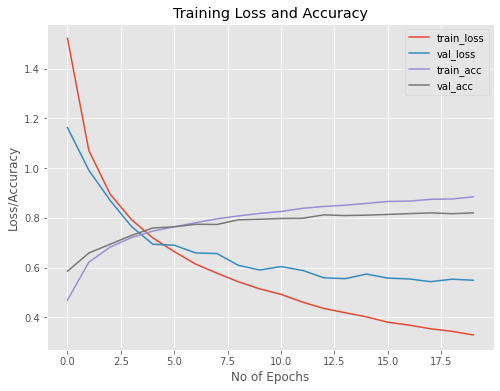

In [ ]:
%matplotlib inline
plt.close('all')
plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("No of Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()